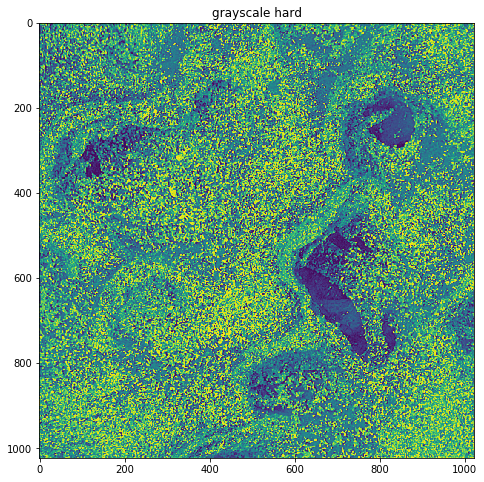

In [11]:
from skimage import color
from skimage.measure import regionprops
from skimage.morphology import disk
import Dataset
import numpy as np
from skimage.filters import rank
from Utils import visualize
from Utils import image_to_grayscale

dataset_list = Dataset.get_full_dataset()
INDEX = 0
data = dataset_list[INDEX]
image, title = data['image'], data['title']

image = color.rgb2gray(image)
image = rank.median(image, disk(2))
    
visualize(image, f'grayscale {title}')

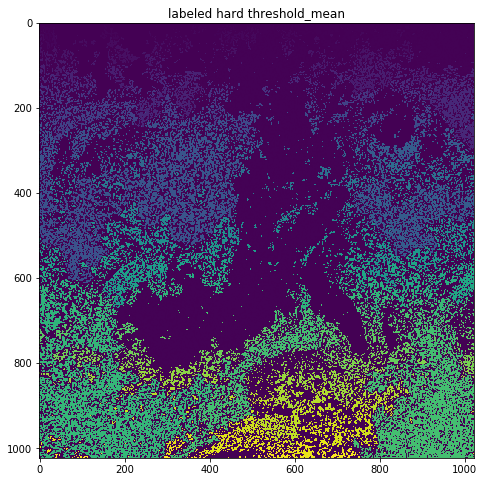

amount hard threshold_mean: 7469


In [12]:
from skimage.filters import threshold_isodata, threshold_otsu, threshold_li, threshold_mean, \
    threshold_minimum, threshold_triangle, threshold_yen, threshold_niblack, rank
from scipy.ndimage import label

threshold_value = threshold_mean(image)
binary = image > threshold_value

labeled, amount = label(binary)
visualize(labeled, f'labeled {title} threshold_mean')
print(f'amount {title} threshold_mean: {amount}')

In [13]:
MAX_REG = 10000
MIN_REG = 100

total_counter = 0

for region in regionprops(labeled):
    if not (MAX_REG > region.area > MIN_REG):
        continue
        
    total_counter += 1

print(f'total_counter {total_counter}')


total_counter 340
